<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº6
#### Mathilde d'Hébrail





### Configuracion e inicio de la simulacion

In [62]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,10)
import matplotlib.pyplot as plt
import scipy.signal as sig
import warnings
warnings.filterwarnings('ignore')
import math
from scipy.stats import binom
import cmath
import pandas as pd

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi
fig_font_size = 16
plt.rcParams.update({'font.size':fig_font_size})


### Creacion de 200 señales senoidales de 1000 muestreas:

In [63]:
a = 2
N = 1000

omega0  = math.pi / 2
fr = []
for i in range(200):
    fr.append(np.random.uniform(-2, 2))

omega1 = []
for i in range(200):
    omega1.append(omega0 + fr[i] * 2*math.pi / N)


x = []
w = []
for i in range(200):
    x.append([])
    for k in range(N):
        x[i].append(a * math.sin(omega1[i] * k))
        
x_matrice = np.array(x).transpose()

w1 = sig.windows.boxcar(N)
w1 = w1[:, np.newaxis]
w2 = sig.windows.bartlett(N)
w2 = w2[:, np.newaxis]
w3 = sig.windows.flattop(N)
w3 = w3[:, np.newaxis]

x_mult_w1 = x_matrice * w1
x_mult_w2 = x_matrice * w2
x_mult_w3 = x_matrice * w3


### Visualisacion del primero de los 200 señales

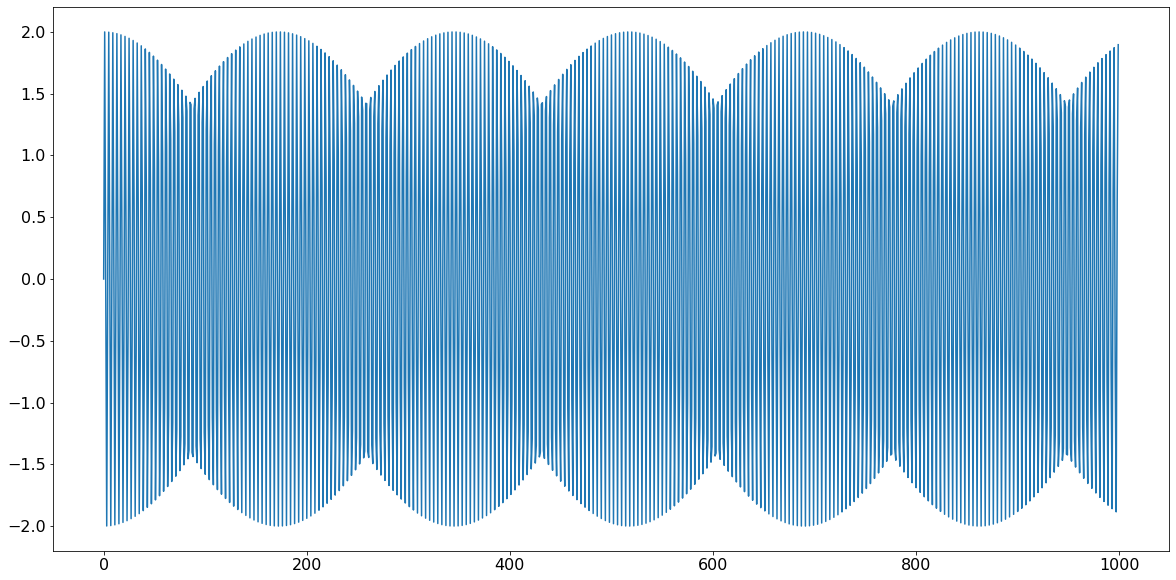

In [64]:
plt.figure(1)
plt.plot(x_matrice[:, 1])
plt.show()

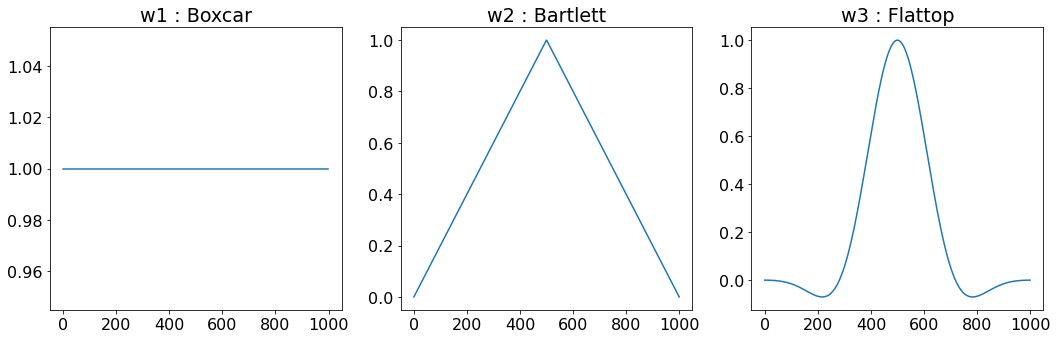

In [65]:
# Créer une figure avec trois sous-graphiques côte à côte
plt.figure(figsize=(15, 5))  # Définir une taille de figure large pour les graphes côte à côte

# Premier graphique
plt.subplot(1, 3, 1)  # 1 ligne, 3 colonnes, 1er graphique
plt.plot(w1)  # Tracer les 100 premiers points de la première colonne
plt.title("w1 : Boxcar")

# Deuxième graphique
plt.subplot(1, 3, 2)  # 1 ligne, 3 colonnes, 2e graphique
plt.plot(w2)  # Tracer les 100 premiers points de la deuxième colonne
plt.title("w2 : Bartlett")

# Troisième graphique
plt.subplot(1, 3, 3)  # 1 ligne, 3 colonnes, 3e graphique
plt.plot(w3)  # Tracer les 100 premiers points de la troisième colonne
plt.title("w3 : Flattop")

# Afficher les graphiques
plt.tight_layout()
plt.show()

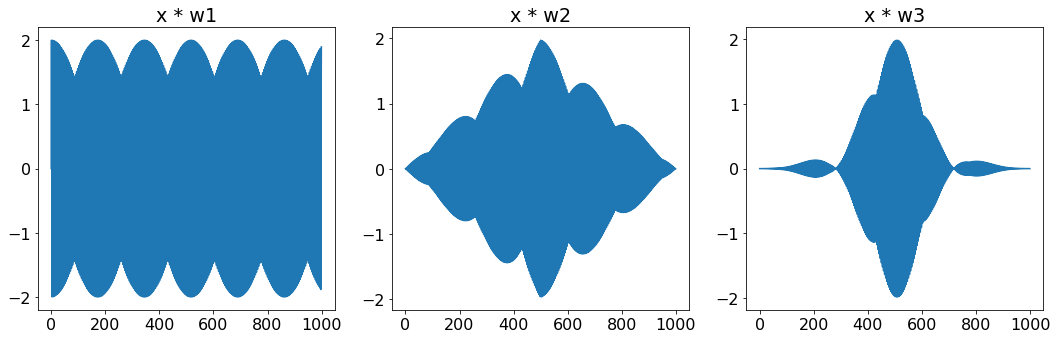

In [66]:
# Créer une figure avec trois sous-graphiques côte à côte
plt.figure(figsize=(15, 5))  # Définir une taille de figure large pour les graphes côte à côte

# Premier graphique
plt.subplot(1, 3, 1)  # 1 ligne, 3 colonnes, 1er graphique
plt.plot(x_mult_w1[:, 1])  
plt.title("x * w1")

# Deuxième graphique
plt.subplot(1, 3, 2)  # 1 ligne, 3 colonnes, 2e graphique
plt.plot(x_mult_w2[:, 1])  
plt.title("x * w2")

# Troisième graphique
plt.subplot(1, 3, 3)  # 1 ligne, 3 colonnes, 3e graphique
plt.plot(x_mult_w3[:, 1])  
plt.title("x * w3")

# Afficher les graphiques
plt.tight_layout()
plt.show()

### Calculo y visualisacion de la FFT, puesta a escala

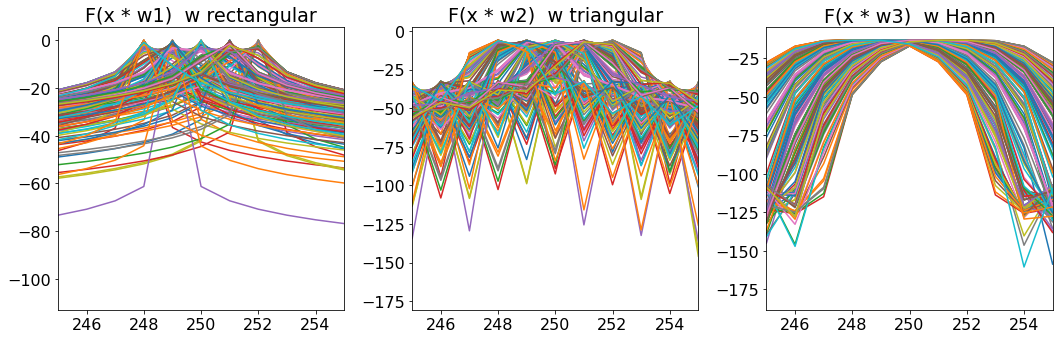

In [67]:
fft_matrice1 = (1/N) * np.fft.fft(x_mult_w1, axis = 0)
fft_matrice2 = (1/N) * np.fft.fft(x_mult_w2, axis = 0)
fft_matrice3 = (1/N) * np.fft.fft(x_mult_w3, axis = 0)

# Créer une figure avec trois sous-graphiques côte à côte
plt.figure(figsize=(15, 5))  # Définir une taille de figure large pour les graphes côte à côte

# Premier graphique
plt.subplot(1, 3, 1)  # 1 ligne, 3 colonnes, 1er graphique
plt.plot(20 * np.log10(abs(fft_matrice1))) 
plt.xlim(245, 255)
plt.title("F(x * w1)  w rectangular")

# Deuxième graphique
plt.subplot(1, 3, 2)  # 1 ligne, 3 colonnes, 2e graphique
plt.plot(20 * np.log10(abs(fft_matrice2)))
plt.xlim(245, 255)
plt.title("F(x * w2)  w triangular")

# Troisième graphique
plt.subplot(1, 3, 3)  # 1 ligne, 3 colonnes, 3e graphique
plt.plot(20 * np.log10(abs(fft_matrice3)))
plt.xlim(245, 255)
plt.title("F(x * w3)  w Hann")

# Afficher les graphiques
plt.tight_layout()
plt.show()

### Calculo y visualisacion del estimador a para un señal

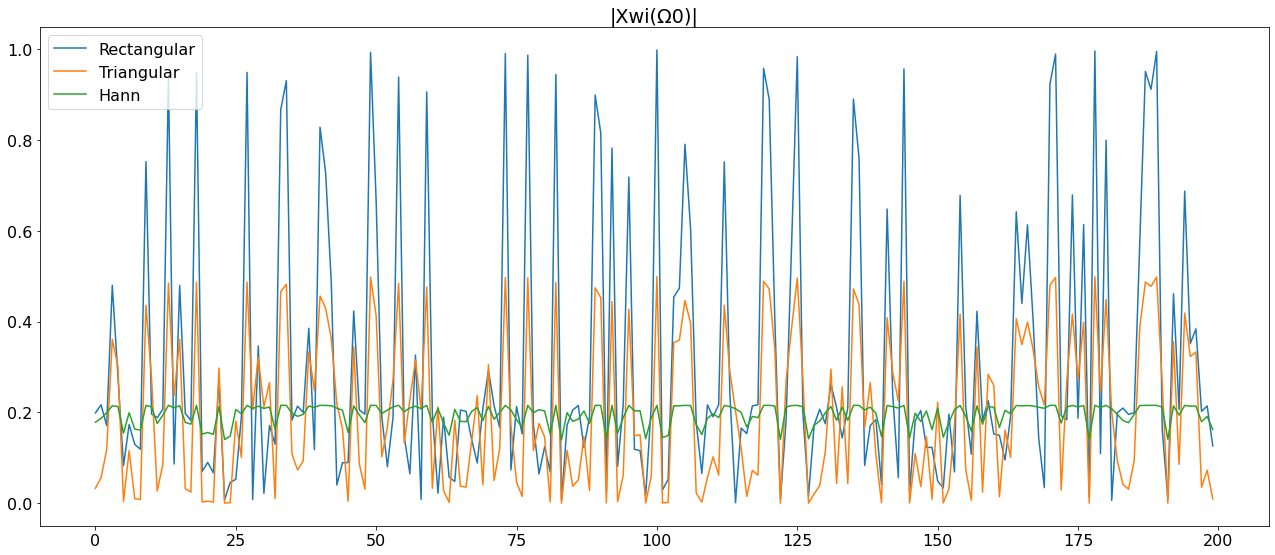

In [68]:
a1 = abs(fft_matrice1[N//4, :])
a2 = abs(fft_matrice2[N//4, :])
a3 = abs(fft_matrice3[N//4, :])


# Créer une figure avec trois sous-graphiques côte à côte
plt.figure(figsize=(18, 8))  
plt.plot(abs(a1), label = "Rectangular")  
plt.plot(abs(a2), label = "Triangular")  
plt.plot(abs(a3), label = "Hann")  
plt.title("|Xwi(Ω0)|")

# Afficher les graphiques
plt.tight_layout()
plt.legend()
plt.show()



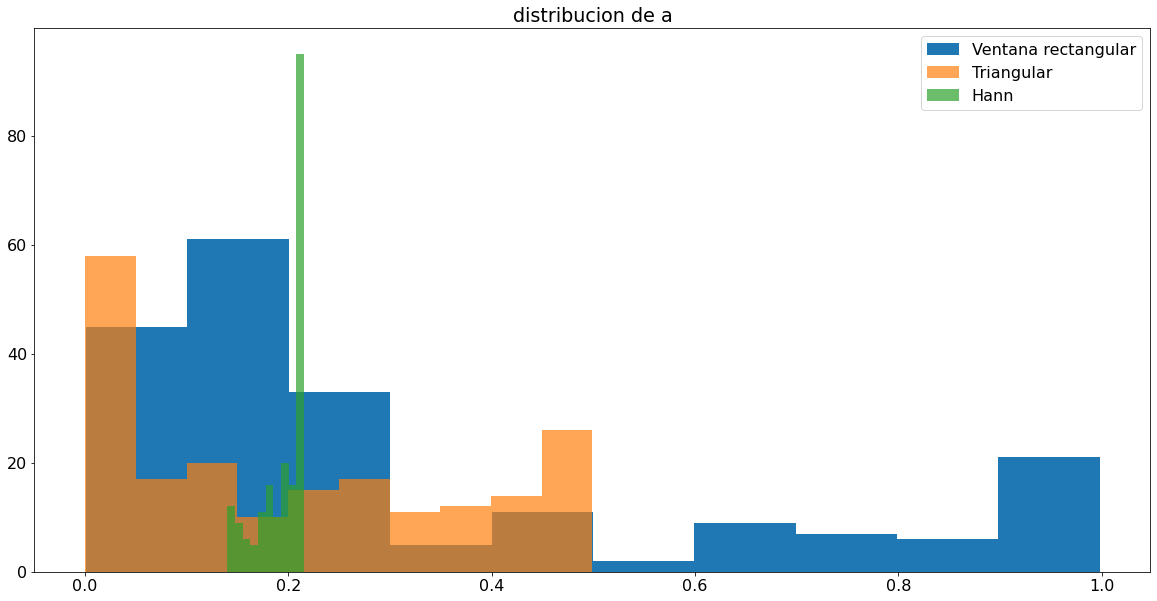

In [69]:
plt.figure(4)
bins = 10
plt.hist(a1, bins=bins, label = "Ventana rectangular", alpha = 1)
plt.hist(a2, bins=bins, label = "Triangular", alpha = 0.7)
plt.hist(a3, bins=bins, label = "Hann", alpha = 0.7)
plt.title("distribucion de a")
plt.legend()
plt.show()


### Sesgo y varianza:

sesgo de a1  -1.6813495314972644
varienza del estimador a1  0.09022359636899985


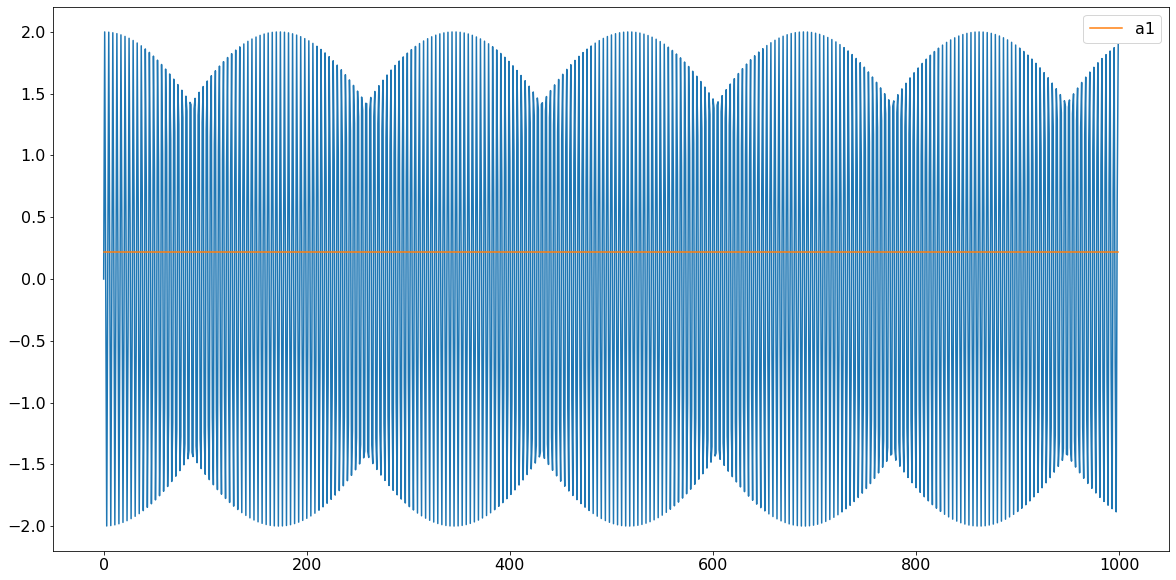

In [70]:
sesgo_a1 = np.mean(a1) - a
var_a1_est = np.mean((a1 - np.mean(a1))**2)
print("sesgo de a1 ", sesgo_a1)
print("varienza del estimador a1 ", var_a1_est)

estimador_a1_matrice = [a1[1] for i in range(1000)]

plt.figure(3)
plt.plot(x_matrice[:,1])
plt.plot(estimador_a1_matrice, label = "a1")
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

sesgo de a2  -1.7953143210399352
varienza del estimador a2  0.02918978765598644


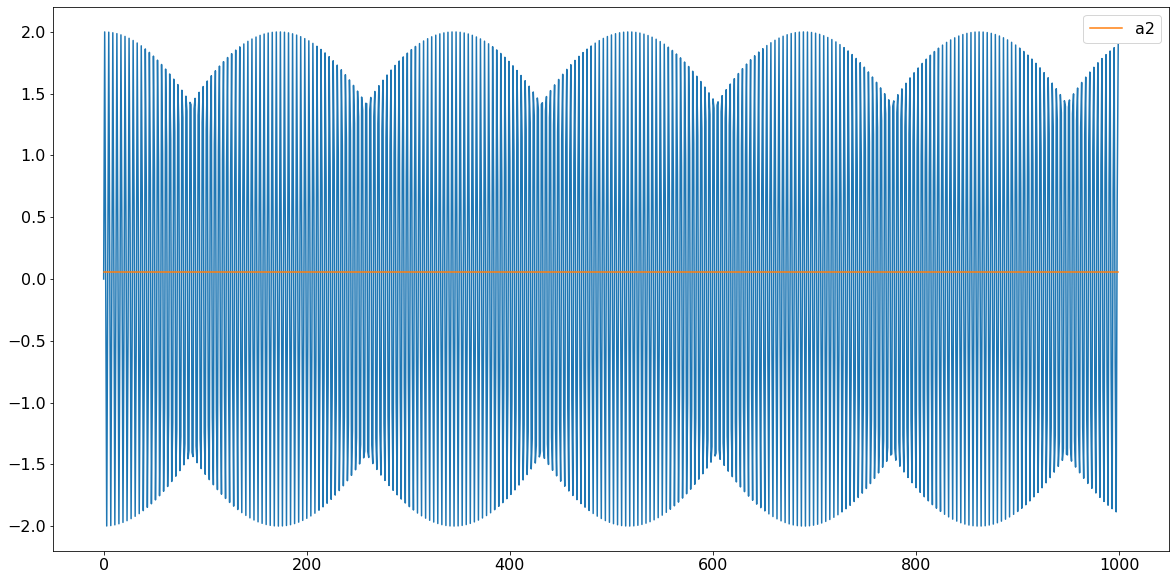

In [71]:
sesgo_a2 = np.mean(a2) - a
var_a2_est = np.mean((a2 - np.mean(a2))**2)
print("sesgo de a2 ", sesgo_a2)
print("varienza del estimador a2 ", var_a2_est)

estimador_a2_matrice = [a2[1] for i in range(1000)]

plt.figure(3)
plt.plot(x_matrice[:,1])
plt.plot(estimador_a2_matrice, label = "a2")
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

sesgo de a3  -1.8046455881399401
varienza del estimador a3  0.0005245466029405332


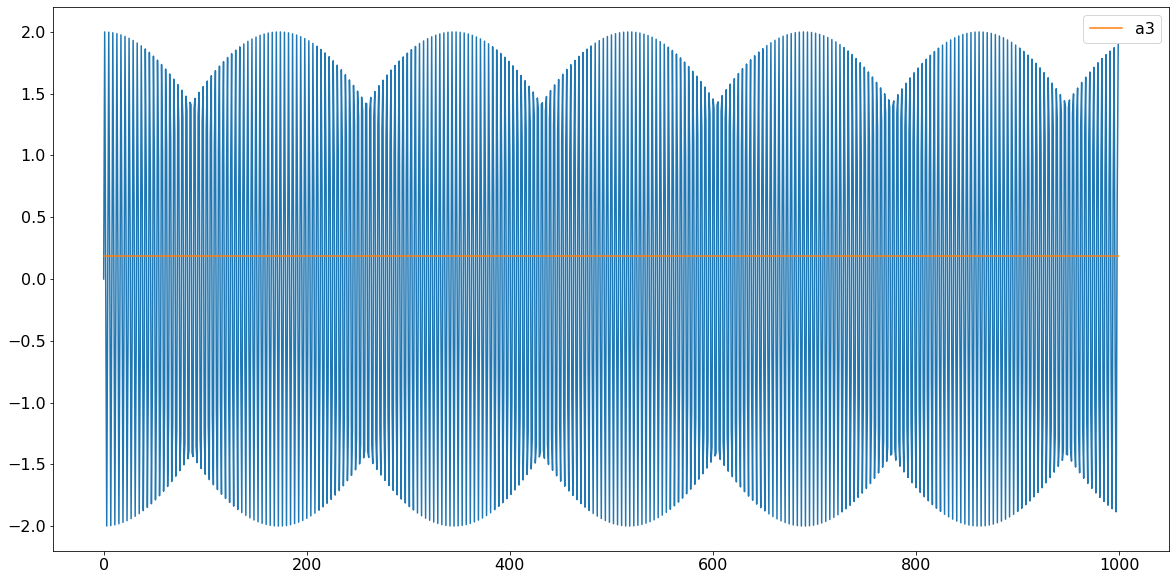

In [72]:
sesgo_a3 = np.mean(a3) - a
var_a3_est = np.mean((a3 - np.mean(a3))**2)
print("sesgo de a3 ", sesgo_a3)
print("varienza del estimador a3 ", var_a3_est)

estimador_a3_matrice = [a3[1] for i in range(1000)]

plt.figure(3)
plt.plot(x_matrice[:,1])
plt.plot(estimador_a3_matrice, label = "a3")
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

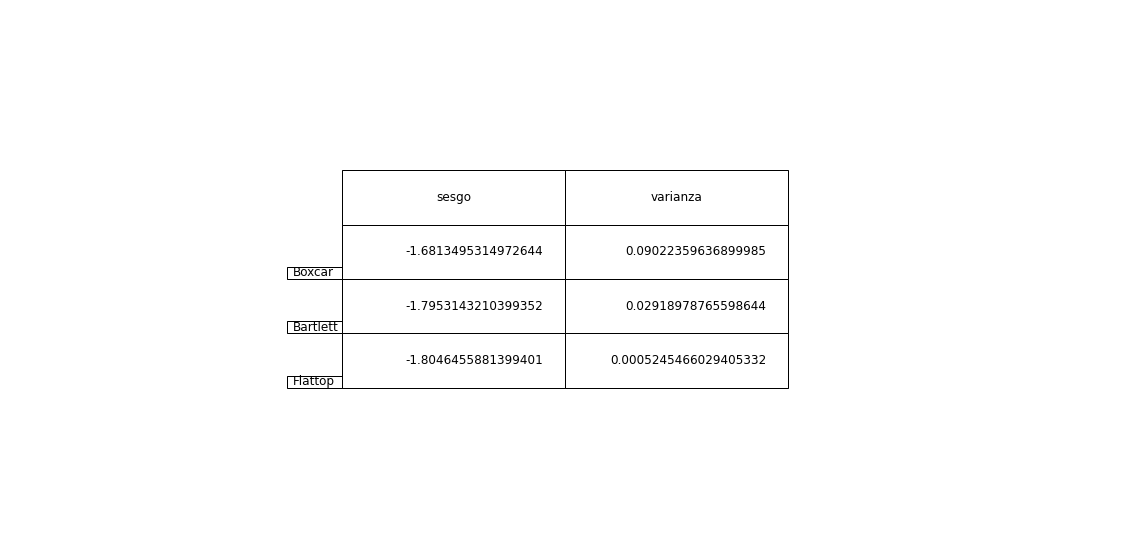

In [73]:
tableau = np.array([[sesgo_a1, var_a1_est], [sesgo_a2, var_a2_est], [sesgo_a3, var_a3_est]])
fig, ax = plt.subplots(1, 1)
column_labels = ["sesgo", "varianza"]
df = pd.DataFrame(tableau, columns=column_labels)
ax.axis("tight")
ax.axis("off")
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    rowLabels=["Boxcar", "Bartlett", "Flattop"],
    loc="center",
    colWidths = [0.2, 0.2]
)

# Augmenter la hauteur des lignes
table.auto_set_font_size(False)
table.set_fontsize(12)
for i in range(len(df)+1):  # Inclut l'en-tête
    for j in range(len(column_labels)):  # Inclut les étiquettes de lignes
        cell = table[i, j]
        cell.set_height(0.1)  # Ajuste la hauteur des lignes (valeur en fractions de la figure)

plt.show()

plt.show()

### Conclusion

La ventana con mlenos sesgo es la ventana de Boxcar, pero la con menos varianza es la ventana de Flattop. Entonces la flattop es la mejor porque el cesgo es facil de corregir y la varianza es mas dificil.